In [5]:
def epoch_find(m,c,x1,d,n,a,b,sse,sse_p):
    theta1 = m
    theta0 = c
    count = 0
    percentile = 100
    
    while(True):
        x = x1
        y = d
        for i in range(0,n): 
            y1 = round(((theta1*x[i])+theta0),8)
            error= round((y1-y[i]),8)
            theta1 = round((theta1 - (0.01 * error * x[i])),8)
            theta0 = round((theta0 - (0.01 * error)),8)
            
        print("epoch",count+1)
        print(theta1,theta0,y1,error)
        a.append(theta0)
        b.append(theta1)
        s = calculate_sse(theta1,theta0,x,y,n)
        sse.append(s)
        
        if(count == 0):
            sse_p.append(100)
        else:
            percentile = round(((sse[count-1]-sse[count])/sse[count-1])*100 , 2)
            if(percentile < 0):
                break
            sse_p.append(percentile)

        count = count+1

In [6]:
def calculate_sse(t1,t0,x,y,n):
    sum = 0
    for i in range(0,n):
        y1 = round((t1*x[i] + t0),8)
        error = y1-y[i]
        sum += (error * error)
    return round(sum,8)

In [7]:
x=[1,2,4,3,5]
y=[1,3,3,2,5]
epoch_for_m = []
epoch_for_c = []
sse = []
sse_percentile =[]
n=5
epoch_find(0,0,x,y,n,epoch_for_m,epoch_for_c,sse,sse_percentile)

epoch 1
0.41007833 0.11881446 1.17460284 -3.82539716
epoch 2
0.62287156 0.18090761 2.69630461 -2.30369539
epoch 3
0.7332419 0.21354939 3.48616065 -1.51383935
epoch 4
0.79043861 0.23089749 3.89606832 -1.10393168
epoch 5
0.82003026 0.24030209 4.1087208 -0.8912792
epoch 6
0.83529119 0.24557924 4.21896645 -0.78103355
epoch 7
0.84311296 0.24871011 4.27604718 -0.72395282
epoch 8
0.84707346 0.25072329 4.30552782 -0.69447218


# all theta values


In [8]:
print("all the theta1 value")
print(epoch_for_m)


all the theta1 value
[0.11881446, 0.18090761, 0.21354939, 0.23089749, 0.24030209, 0.24557924, 0.24871011, 0.25072329]


In [9]:
print("all the theta0 value")
print(epoch_for_c)

all the theta0 value
[0.41007833, 0.62287156, 0.7332419, 0.79043861, 0.82003026, 0.83529119, 0.84311296, 0.84707346]


In [10]:
print("all the sum of square errors")
print(sse)

all the sum of square errors
[14.44667658, 5.52982881, 3.19234722, 2.59651206, 2.45362001, 2.42423883, 2.42099651, 2.42248363]


In [11]:
print("all the percentiles to find the best fit")
print(sse_percentile)

all the percentiles to find the best fit
[100, 61.72, 42.27, 18.66, 5.5, 1.2, 0.13]


In [16]:
ind_var=[]
dep_var = []
l = len(sse_percentile)
for i in range(0,l):
    ind_var.append(i+1)
    dep_var.append(sse[i])
dep_var

[14.44667658,
 5.52982881,
 3.19234722,
 2.59651206,
 2.45362001,
 2.42423883,
 2.42099651]

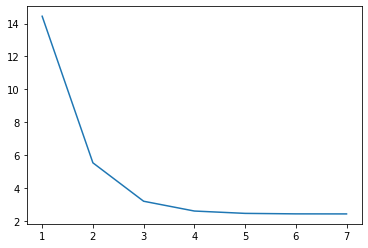

In [17]:
#import numpy as np
import matplotlib.pyplot as plt

plt.plot(ind_var,dep_var)
plt.show()